In [19]:
nova_lista_2 = [ [item+'\n' for item in linha] for linha in lista_2 ]

In [21]:
nova_lista = []

for linha in lista_2:
    
    nova_linha = []
    for item in linha:    
        nova_linha.append(item+'\n')
    
    nova_lista.append(nova_linha)

In [22]:
nova_lista

[['jean\n', '26\n', 'MG\n', 'BH\n'], ['luis\n', '23\n', 'RJ\n', 'Niteroi\n']]

In [53]:
str([{i:i**2 for i in range(3)} for j in range(5)])

'[{0: 0, 1: 1, 2: 4}, {0: 0, 1: 1, 2: 4}, {0: 0, 1: 1, 2: 4}, {0: 0, 1: 1, 2: 4}, {0: 0, 1: 1, 2: 4}]'

---

### Formato csv

In [108]:
dados = '''[
  {
    "apn": "06037-5782020007",
    "zip_code": 91007,
    "property_type": "residential",
    "lot": 20492,
    "sqft": 2991,
    "beds": 4,
    "baths": 2.5,
    "price": 2168000
  },
  {
    "apn": "06037-5436013020",
    "zip_code": 90039,
    "property_type": "residential",
    "lot": 6752,
    "sqft": 1533,
    "beds": 3,
    "baths": 2,
    "price": 898000
  },
  {
    "apn": "06037-2549013007",
    "zip_code": 91040,
    "property_type": "residential",
    "lot": 38757,
    "sqft": 3146,
    "beds": 4,
    "baths": 4,
    "price": 998999
  },
  {
    "apn": "06059-03318106",
    "zip_code": 92831,
    "property_type": "residential",
    "lot": 6375,
    "sqft": 1364,
    "beds": 3,
    "baths": 1,
    "price": 549000
  },
  {
    "apn": "06059-93279051",
    "zip_code": 92637,
    "property_type": "residential",
    "lot": 1700,
    "sqft": 1592,
    "beds": 3,
    "baths": 2,
    "price": 699999
  }
]'''

In [109]:
# lista = dados.replace('\n', '').replace(' ', '').replace('"', '').replace('[', '').replace(']').split('},{')

simbolos = ['\n', ' ', '"', '[', ']']
for simbolo in simbolos: 
    dados = dados.replace(simbolo, '')

lista = dados.split('},{')
    

lista[0] = lista[0].replace('{', '')
lista[-1] = lista[-1].replace('}', '')

lista_de_listas = [item.split(',') for item in lista]

valores, chaves = [], []
for lista in lista_de_listas:

    linha = []
    for item in lista:
        
        chave, valor = item.split(':')
        
        linha.append(valor)
        if lista==lista_de_listas[0]: chaves.append(chave)

    valores.append( ','.join(linha) )


chaves = ','.join(chaves) + '\n'

texto = '\n'.join(valores)

resultado = chaves + texto

print(resultado)

apn,zip_code,property_type,lot,sqft,beds,baths,price
06037-5782020007,91007,residential,20492,2991,4,2.5,2168000
06037-5436013020,90039,residential,6752,1533,3,2,898000
06037-2549013007,91040,residential,38757,3146,4,4,998999
06059-03318106,92831,residential,6375,1364,3,1,549000
06059-93279051,92637,residential,1700,1592,3,2,699999


---

In [18]:
lista_1 = ['nome', 'idade', 'estado', 'cidade']
lista_2 = [['jean', '26', 'MG', 'BH'], ['luis', '23', 'RJ', 'Niteroi']]

dicionario = {}
chaves = lista_1[1:]

for linha in lista_2:
    
    nome = linha[0]
    valores = linha[1:]

    dicionario[nome] = {chave:valor for chave, valor in zip(chaves, valores)}
    

print(dicionario)

{'jean': {'idade': '26', 'estado': 'MG', 'cidade': 'BH'}, 'luis': {'idade': '23', 'estado': 'RJ', 'cidade': 'Niteroi'}}


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

from IPython.display import clear_output

pd.set_option('display.max_rows', 1000)

from datetime import datetime

In [2]:
import seaborn as sns

In [3]:
comando = pd.read_csv('Extração Sistema Comando.csv', sep='|')
alertas = pd.read_excel('4 - App COR.RIO alertas - atualizado.xlsx')

C:\Users\luisr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Tabelas

In [ ]:
alertas.head()

In [ ]:
comando.head()

# Funções

In [45]:
def remover_acentos(string):

    item = string.lower()
    for a, b in zip(['á', 'é', 'í', 'ó', 'ú'], ['a', 'e', 'i', 'o', 'u']):
        item = item.replace(a, b)
    
    return item

In [46]:
def find_in_col(col, word_list, avoid):

    word_dict = {word:{'Contagem':0, 'Items':[], 'Index':[], 'Palavras':[]} for word in word_list}
    for word in word_list:

        for index, item in zip(col.index, col):
            if type(item)==float: continue
            new_item = remover_acentos(item)

            if word in new_item:
                
                if sum([avoid_word in new_item for avoid_word in avoid])==0:

                    word_dict[word]['Contagem']+=1
                    word_dict[word]['Items'].append(new_item)     
                    word_dict[word]['Index'].append(index)

                    word_lst = new_item.split()
                    for palavra in word_lst:
                        if word in palavra:
                            word_dict[word]['Palavras'].append(palavra)

    return word_dict
    

In [47]:
def format_col(col):
    
    for item, index in zip(col, col.index):
        
        lst = item.split(' ')
            
        if len(lst[0])>=3:
            if lst[0][2]=='h':
                new_item = ' '.join(lst[2:]); col[index]=new_item; continue
            
        if lst[-1][-1]==')':
            
            lst = item.split(' ')
            ind='a'
            for word in reversed(lst):
                
                if word[0]=='(':
                    ind = lst.index(word)
                    break
                    
            if ind!='a':
                new_item = ' '.join(lst[:ind])
                col[index]=new_item
      
    return new_col

In [48]:
def col_to_date(col):
    new_col = []
    cnt=0
    for item in col:
        cnt+=1
        clear_output(wait=True); print(f'{cnt}/{len(col)}')
        date = item.split(' ')[0].replace('-', '/').split('/');# date[0]=date[0][2:]
        date = '/'.join([date[i] for i in [1,0]])
        new_col.append(datetime.strptime(date, '%m/%Y').date())
    
    return pd.Series(new_col, index = col.index)

# Configurações

MT - moto
VP - veiculo de passeio
ON - onibus
CM - caminhao
UT - utilitario
AC - acidente

In [55]:
word_list = buscas = ['mt', 'moto', 'motoboy', 'entregador', 'entrega', 'ifood',
                      'delivery', 'motocicleta', 'bicicleta',
                      'bike', 'ciclista', 'vermelha']

comando_cols = ['EVENTO_TITULO', 'EVENTO_DESCRICAO', 'POP_TITULO', 'POP_DESCRICAO', 'ACAO']

out = ['(motoristas', 'http://sgtu.rio.rj.gov.br/mototaxiagendar/index',
       'motor', 'motorista', 'motorista!', 'motorista,', 'motorista.',
       'motoristas', 'motoristas!', 'motoristas,', 'motoristas.', 'motoristas:']

out_mt = ['almte', 'almte.', 'cmte', 'cmte.', 'comte',
          'mt.ocupando', 'mte.', 'mtxon', 'samto', 'semt.',
          'smtr', 'vpxmt', 'xmt']

---

# LIMPEZA E MINEIRAÇÃO DOS DADOS

# Contagem ALERTA

In [56]:
alertas_dict = find_in_col(alertas['Mensagem'], buscas, avoid=out+out_mt)
alertas_msg = pd.Series([alertas_dict[word]['Contagem']/len(alertas)*100 for word in word_list], index=word_list)

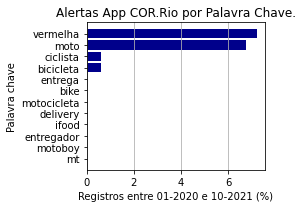

In [57]:
fig = plt.figure(figsize=(4,3)); ax = fig.add_subplot(111)

ax.barh(alertas_msg.sort_values(ascending=True).index,
        alertas_msg.sort_values(ascending=True),
        color='darkblue')

ax.set(title='Alertas App COR.Rio por Palavra Chave.',
       xlabel='Registros entre 01-2020 e 10-2021 (%)',
       ylabel='Palavra chave')

plt.grid(axis='x')

fig.tight_layout(); plt.show(); fig.savefig('Charts/Alertas por Palavra Chave.png', tight_layout=True)

In [52]:
motos, bic, cic = [alertas.loc[alertas_dict[word]['Index']] for word in ['moto', 'bicicleta', 'ciclista']]

moto = pd.concat([motos, bic, cic], 0).drop_duplicates()

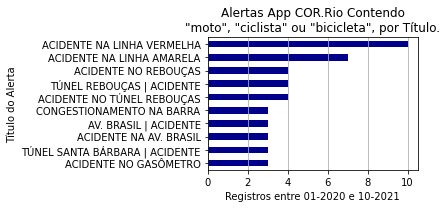

In [14]:
fig = plt.figure(figsize=(6,3)); ax = fig.add_subplot(111)

motos['Titulo'].value_counts(ascending=True).tail(10).plot.barh(ax=ax, color='darkblue')

ax.set(title='Alertas App COR.Rio Contendo\n"moto", "ciclista" ou "bicicleta", por Título.',
       xlabel='Registros entre 01-2020 e 10-2021',
       ylabel='Título do Alerta')

plt.grid(axis='x')

fig.tight_layout(); plt.show(); fig.savefig('Charts/Alertas por Título.png', tight_layout=True)

In [15]:
date = col_to_date(moto['Data'])

239/239


In [16]:
date_df = pd.concat([moto['Titulo'], date], 1)

In [17]:
date_cnt = date_df.groupby(0).count()
y_values = date_cnt['Titulo'].tolist()
x_values = date_cnt.index.tolist()

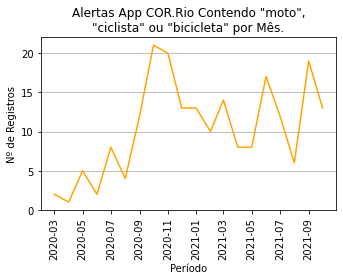

In [18]:
fig = plt.figure(figsize=(5,4)); ax = fig.add_subplot(111)

ax.plot(x_values[1:], y_values[1:],color='orange')
plt.xticks(rotation=90)

ax.set(title='Alertas App COR.Rio Contendo "moto",\n"ciclista" ou "bicicleta" por Mês.',
       ylabel='Nº de Registros',
       xlabel='Período')

plt.grid(axis='y')

fig.tight_layout(); plt.show(); fig.savefig('Charts/Alertas por Mês.png', tight_layout=True)


# Contagem COMANDO

In [20]:
comando_dicts = {}; cnt=0
for col in comando_cols:
    cnt+=1
    clear_output(wait=True); print(f'{cnt}/{len(comando_cols)}')
    comando_dicts[col] = find_in_col(comando[col], buscas, avoid=out+out_mt)

5/5


In [21]:
comando_contagens = {}
for col in comando_cols:
    comando_contagens[col] = pd.Series([comando_dicts[col][word]['Contagem']/len(comando)*100 for word in word_list], index=word_list)

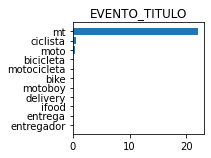

In [22]:
fig = plt.figure(figsize=(7,4))
axs = fig.add_subplot(2,3,1)
axs.barh(comando_contagens[comando_cols[0]].sort_values().index,
         comando_contagens[comando_cols[0]].sort_values())
axs.set(title=comando_cols[0])

fig.tight_layout()

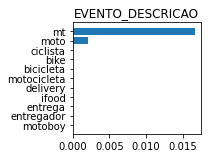

In [23]:
fig = plt.figure(figsize=(7,4))
axs = fig.add_subplot(2,3,1)
axs.barh(comando_contagens[comando_cols[1]].sort_values().index,
         comando_contagens[comando_cols[1]].sort_values())
axs.set(title=comando_cols[1])

fig.tight_layout()

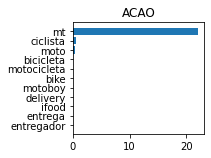

In [24]:
fig = plt.figure(figsize=(7,4))
axs = fig.add_subplot(2,3,1)
axs.barh(comando_contagens[comando_cols[0]].sort_values().index,
         comando_contagens[comando_cols[0]].sort_values())
axs.set(title=col)

fig.tight_layout()

# Extraindo Palavras para Evitar

In [ ]:
out_index1 = []

avoid1 = list(np.unique(alertas_dict['moto']['Palavras']))
for word in avoid1[1:]:
    
    print(word); 
    inp = input(); if inp=='exit': break
    if inp=='s': out_index1.append(avoid1.index(word));

out1 = [avoid1[0]] + [avoid1[i] for i in out_index1]

In [ ]:
out_index2 = []

avoid2 = []
for col in comando_dicts.keys():
    avoid2+=comando_dicts[col]['moto']['Palavras']
avoid2 = list(np.unique(avoid2))

for word in avoid2:
    
    print(word); 
    inp = input()
    if inp=='exit': break;
    if inp=='s': out_index2.append(avoid2.index(word));

out2 = [avoid2[i] for i in out_index2]

In [219]:
out3 = list(np.unique(out1+out2))

In [599]:
avoid_mt = []
for col in comando_dicts.keys():
    avoid_mt+=comando_dicts[col]['mt']['Palavras']
avoid_mt = list(np.unique(avoid_mt))

In [ ]:
out_index_mt = []
for word in avoid_mt:
    
    print(word); 
    inp = input()
    if inp=='exit': break;
    if inp=='s': out_index_mt.append(avoid_mt.index(word));

out_mt = [avoid_mt[i] for i in out_index_mt]

### Palavras para evitar:

In [624]:
print(out3)

['(motoristas', 'http://sgtu.rio.rj.gov.br/mototaxiagendar/index', 'motor', 'motorista', 'motorista!', 'motorista,', 'motorista.', 'motoristas', 'motoristas!', 'motoristas,', 'motoristas.', 'motoristas:']


In [625]:
print(out_mt)

['almte', 'almte.', 'cmte', 'cmte.', 'comte', 'mt.ocupando', 'mte.', 'mtxon', 'samto', 'semt.', 'smtr', 'vpxmt', 'xmt']


# Extraindo Palavras Incluídas

In [43]:
avoid1 = list(np.unique(alertas_dict['moto']['Palavras']))

avoid2 = []
for col in comando_dicts.keys():
    avoid2+=comando_dicts[col]['moto']['Palavras']
avoid2 = list(np.unique(avoid2))

In [44]:
avoid1_cic = list(np.unique(alertas_dict['ciclista']['Palavras']))

avoid2_cic = []
for col in comando_dicts.keys():
    avoid2_cic+=comando_dicts[col]['ciclista']['Palavras']
avoid2_cic = list(np.unique(avoid2_cic))

### Palavras Incluidas:

In [45]:
print(set(np.unique(avoid1)).difference(out))

{'motociclista,', 'motociclistas.', 'motos,', 'moto.', 'motos', 'moto', 'motociclista.', 'motociclistas', 'moto,', 'motos.', 'motociclista'}


In [46]:
encontrado = set(np.unique(avoid1+avoid2)).difference(out); print(encontrado)

{'motociata', 'mototaxistas', '(motocicleta', 'moto', 'moto-taxistas', 'motociclista.', 'motos.', '(mototaxistas)', 'motociclista', 'motociclistico', 'motos)', 'motociclistas.', 'motociclista,', 'motos,', 'motocicleta', 'motoqueiros', 'motos', 'moto.', 'moto,', 'motociclistas', '(motociata)', 'motoboys', 'motociclistia.', 'motociclistica', 'mototaxista'}


In [47]:
print(set(np.unique(avoid1_cic)).difference(out))

{'motociclista,', 'motociclistas.', 'motociclista.', 'motociclistas', 'ciclista', 'ciclista,', 'motociclista'}


In [48]:
set(np.unique(avoid2_cic)).difference(out)

{'ciclista', 'ciclistas', 'motociclista', 'motociclista.', 'motociclistas'}

---

# Extraindo Registros do Sistema Comando Contendo 'mt' (Moto)

In [97]:
com_df = comando_moto = comando.loc[comando_dicts[comando_cols[0]]['mt']['Index']]
com_df.to_csv('Dados Limpos/Comando_Motos.csv')

In [ ]:
print('Registros da tabela comando contendo "mt":', round(len(comando_moto)/len(comando)*100, 2), '%')

print('Registros da tabela de alertas contendo "moto", "bicicleta" ou "ciclista":', round(len(moto)/len(alertas)*100, 2), '%')

<empty space>

---

# ANÁLISE EXPLORATÓRIA DOS DADOS

### Contagem de eventos envolvendo moto

In [51]:
len(com_df['EVENTO_ID'].unique())

9873

In [52]:
id_cnt = com_df.groupby('EVENTO_ID').count()[com_df.columns[1]]

In [53]:
id_cnt_com = comando.groupby('EVENTO_ID').count()[com_df.columns[1]]

In [54]:
print('Nº de Eventos:', len(id_cnt_com))
print('Nº de Eventos com Moto:', len(id_cnt))
print('Porcentagem de Eventos com Moto:', round(len(id_cnt)/len(id_cnt_com), 4)*100, '%')

Nº de Eventos: 61162
Nº de Eventos com Moto: 9873
Porcentagem de Eventos com Moto: 16.14 %


### Gráficos de Pizza

In [4]:
similar_cols = ['EVENTO_ID', 'EVENTO_TITULO', 'EVENTO_DESCRICAO', 'EVENTO_GRAVIDADE',
                'STATUS', 'EVENTO_INICIO', 'EVENTO_FIM', 'POP_TITULO', 'POP_DESCRICAO']

In [96]:
eventos = com_df.groupby(similar_cols, as_index=False).count()[similar_cols];
#eventos.to_csv('Dados Limpos/Eventos.csv')

In [71]:
cols = ['EVENTO_GRAVIDADE', 'POP_TITULO', 'ORGAO_NOME', 'ACAO']
limits = [2, 4, 5, 6]; sizes = [(4,3), (5,3), (5,3), (5,3)]
titles = ['Registros Sistema Comando\n Envolvendo Motos, por Orgão (%)',
          'Registros Sistema Comando\n Envolvendo Motos, por Ação (%)']
titles2 = ['Eventos Sistema Comando\n Envolvendo Motos, por Gravidade (%)',
          'Eventos Sistema Comando\n Envolvendo Motos, por Título (%)']

In [137]:
sns.set(font_scale=1.)

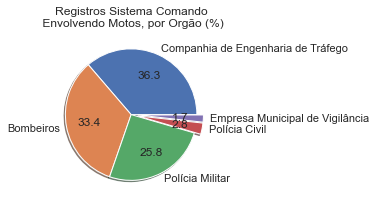

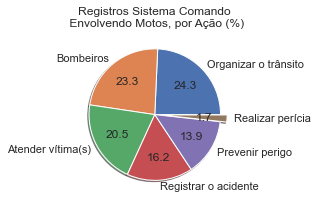

In [141]:
cnt=0
for col, limit, size , title in zip(cols[2:], limits[2:], sizes[2:], titles): 
    cnt+=1
    fig = plt.figure(figsize=size); ax=fig.add_subplot()
    
    
    df = com_df.groupby(['EVENTO_ID', col]).count().groupby(col).count().iloc[:, 0].sort_values(ascending=False).iloc[:limit]
    labels = df.index.tolist().copy()
    labels[1]='Bombeiros'
#    labels[0] = 'Companhia de Engenharia\nde Tráfego'; labels[4] = 'Empresa Municipal\nde Vigilância'
    
    ax.pie(df, labels=labels, autopct=f'%.1f', pctdistance=0.65, shadow=True,
           explode=([0,0,0,0,0,0.1] if cnt==2 else [0,0,0,0.1,0.1]))
    
    ax.set(title=title)
    fig.tight_layout();
    plt.show(); fig.savefig('Charts/'+title.replace('\n', ' ')+'.png', tight_layout=True)
    

['BAIXO', 'MEDIO']


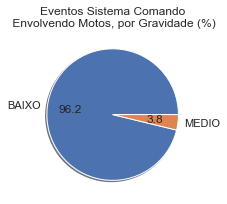

['Acidente com vítima(s)', 'Acidente/enguiço sem vítima', 'Atropelamento', 'Acidente com vítima(s) fatal(is)']


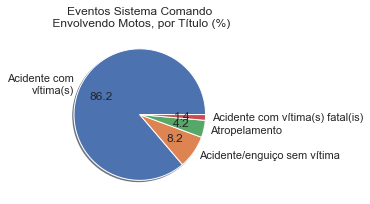

In [145]:
for col, limit, size , title in zip(cols[:2], limits[:2], sizes[:2], titles2): 
    fig = plt.figure(figsize=size); ax=fig.add_subplot()
    
    
    df = eventos.groupby(col).count().iloc[:, 0].sort_values(ascending=False).iloc[:limit]
    labels = df.index.tolist(); print(labels);
    if labels[0]!='BAIXO': labels[0] = 'Acidente com\nvítima(s)'
    ax.pie(df, labels=labels, autopct=f'%.1f', pctdistance=0.65, shadow=True)
    
    ax.set(title=title)
    fig.tight_layout(); plt.show(); fig.savefig('Charts/'+title.replace('\n', ' ')+'.png', tight_layout=True)

# Análises Temporais

### Funções

In [23]:
def col_datetime(col, date_format='%m/%Y', method='date'):
    new_col = []; 
    cnt=0
    for item in col:
        cnt+=1; 
        
        if cnt in range(1, len(col), 100): clear_output(wait=True); print(f'{cnt}/{len(col)}');
        
        if method=='date':
            new_col.append(datetime.strptime(item, date_format).date())

        elif method=='time':
            new_col.append(datetime.strptime(item, date_format).time())

        else:
            new_col.append(datetime.strptime(item, date_format))


    return pd.Series(new_col, index = col.index)

In [89]:
def choose_date(col, keep=['year', 'month', 'day', 'hour', 'minute']):
    
    new_col=[]; cnt=0
    for item in col:
        
        cnt+=1
        if cnt in range(0,len(col),1): clear_output(wait=True); print(f'{cnt}/{len(col)}')
        
        params = ['year', 'month', 'day', 'hour', 'minute']
        params_values = [item.year, item.month, item.day, item.hour, item.minute]
        params_dict = {param:value for param, value in zip(params, params_values) if param in keep}
        print(params_dict)
        
        new_col.append(pd.Timestamp(**params_dict))
    
    return pd.Series(new_col, index=col.index)

In [209]:
def plot_by_metric(metric, method):

    df = choose_metric(eventos_date['EVENTO_INICIO'], metric=metric)

    df = pd.concat([eventos_date['EVENTO_ID'], df], 1)
    df = df.groupby(0).count()

    y_values = df['EVENTO_ID'].tolist()
    x_values = df.index.tolist()

    fig = plt.figure(figsize=(5,3.5)); ax = fig.add_subplot(111)

    if method=='plot': ax.plot(x_values[:], y_values[:],color='orange')
    elif method=='bar': ax.bar(x_values[:], y_values[:],color='orange')
    
    plt.xticks(rotation=90)

    ax.set(title='Série Histórica Mensal de Eventos Envolvendo Motos.',
           ylabel='Nº de Eventos',
           xlabel='Período')

    plt.grid(axis='y')

    fig.tight_layout(); plt.show(); #fig.savefig('Charts/Alertas por Mês.png', tight_layout=True)


In [176]:
def YearMonth(col):
    new_col = []
    cnt=0
    for item in col:
        cnt+=1
        if cnt in range(0, len(col), 500): clear_output(wait=True); print(f'{cnt}/{len(col)}')
        
        date = '/'.join([str(i) for i in [item.year, item.month]])
        
        new_col.append(datetime.strptime(date, '%Y/%m').date())
    
    return pd.Series(new_col, index = col.index)

In [95]:
def choose_metric(col, metric='year'):
    
    new_col = []
    cnt=0
    for item in col:
        cnt+=1
        if cnt in range(0, len(col), 500): clear_output(wait=True); print(f'{cnt}/{len(col)}')
        
        params = ['year', 'month', 'day', 'hour', 'minute', 'week', 'weekday']
        params_values = [item.year, item.month, item.day, item.hour, item.minute, item.week, item.weekday()]
        
        new_item = [value for value, param in zip(params_values, params) if param==metric][0]

        new_col.append(new_item)
    
    return pd.Series(new_col, index = col.index, name=metric)

In [248]:
def plot_by_metric(metric, method, figsize=(5,3.5),
                   title='Série Histórica Mensal de Eventos Envolvendo Motos.',
                   xlabel='Período', ylabel='Nº de Eventos', grid='x', color='darkblue',
                   xlim=None, ylim=None, width=0.8, path=None, labels=None
                  ):

    df = choose_metric(eventos_date['EVENTO_INICIO'], metric=metric)

    df = pd.concat([eventos_date['EVENTO_ID'], df], 1)
    df = df.groupby(metric).count()

    y_values = df['EVENTO_ID'].tolist()
    x_values = df.index.tolist()
    if type(labels)!=type(None): x_values = [labels[key] for key in x_values]

    fig = plt.figure(figsize=figsize); ax = fig.add_subplot(111)

    if method=='plot': ax.plot(x_values[:], y_values[:],color=color)
    elif method=='bar': ax.bar(x_values[:], y_values[:],color=color)

    plt.xticks(rotation=90)

    ax.set(title=title,
           ylabel=ylabel,
           xlabel=xlabel,
           xlim=xlim,
           ylim=ylim,
          )

    plt.grid(axis=grid)

    fig.tight_layout(); plt.show(); fig.savefig(path, tight_layout=True)


In [92]:
def mean_datetime(metric1 = 'month', metric2 = 'day'):

    year = choose_metric(eventos_date['EVENTO_INICIO'], metric=metric1)
    month = choose_metric(eventos_date['EVENTO_INICIO'], metric=metric2)
    return pd.concat([year, month], 1).reset_index().groupby([metric1, metric2]).count().groupby([metric2]).mean()

In [238]:
def avg_bar(df, method='bar', figsize=(5,3.5),
            title='Série Histórica Mensal de Eventos Envolvendo Motos.',
            xlabel='Período', ylabel='Nº de Eventos', grid='y', color='darkblue',
            xlim=None, ylim=None, width=0.8, path=None, labels=None
            ):

    y_values = df.iloc[:,0].tolist()
    x_values = df.iloc[:,0].index.tolist()
    if type(labels)!=type(None): x_values = [labels[key] for key in x_values]
    
    fig = plt.figure(figsize=figsize); ax = fig.add_subplot(111)

    if method=='plot': ax.plot(x_values[:], y_values[:],color=color)
    elif method=='bar': ax.bar(x_values[:], y_values[:],color=color)

    plt.xticks(rotation=90)

    ax.set(title=title,
           ylabel=ylabel, xlabel=xlabel,
           xlim=xlim, ylim=ylim,
          )

    plt.grid(axis=grid)

    fig.tight_layout(); plt.show(); fig.savefig(path, tight_layout=True)


---

### Formatando Datas e Horas

In [24]:
date_cols= ['EVENTO_ID', 'EVENTO_INICIO', 'EVENTO_FIM']
eventos_date = eventos[date_cols].copy()

eventos_date['EVENTO_INICIO'] = col_datetime(eventos['EVENTO_INICIO'], '%Y-%m-%d %H:%M:%S', method='none')
eventos_date['EVENTO_FIM'] = col_datetime(eventos['EVENTO_FIM'], '%Y-%m-%d %H:%M:%S', method='none')

eventos_date['EVENTO_INICIO_DATA'] = col_datetime(eventos['EVENTO_INICIO'], '%Y-%m-%d %H:%M:%S', method='date')
eventos_date['EVENTO_FIM_DATA'] = col_datetime(eventos['EVENTO_FIM'], '%Y-%m-%d %H:%M:%S', method='date')

eventos_date['EVENTO_INICIO_HORA'] = col_datetime(eventos['EVENTO_INICIO'], '%Y-%m-%d %H:%M:%S', method='time')
eventos_date['EVENTO_FIM_HORA'] = col_datetime(eventos['EVENTO_FIM'], '%Y-%m-%d %H:%M:%S', method='time')

eventos_date['DURACAO'] = eventos_date['EVENTO_FIM'] - eventos_date['EVENTO_INICIO']

#eventos_date.to_csv('Dados Limpos/Eventos_Datas.csv')

9801/9861


### Recarregando Dados Limpos

In [5]:
eventos = pd.read_csv('Dados Limpos/Eventos.csv', index_col=0)

com_df = comando_moto = pd.read_csv('Dados Limpos/Comando_Motos.csv', index_col=0)

eventos_date = pd.read_csv('Dados Limpos/Eventos_Datas.csv', index_col=0);

---

In [220]:
hour = choose_metric(eventos_date['EVENTO_INICIO'], metric='hour')
day = choose_metric(eventos_date['EVENTO_INICIO'], metric='day')
month = choose_metric(eventos_date['EVENTO_INICIO'], metric='month')
year = choose_metric(eventos_date['EVENTO_INICIO'], metric='year')

9500/9861


### Distribuição Geral Inícios de Eventos (Histograma Horas do Dia)

9500/9861


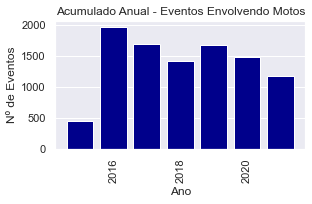

In [242]:
plot_by_metric('year', method='bar', ylim=(None,None), width=1, figsize=(4.5,3),
               title='Acumulado Anual - Eventos Envolvendo Motos', 
               xlabel='Ano', ylabel='Nº de Eventos', path='Charts/ano.png')

### Distribuição Anual Inícios de Eventos (Histograma Mês do Ano)

9500/9861


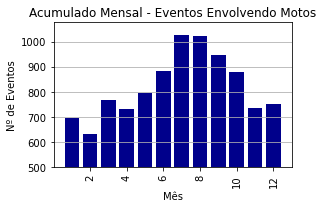

In [331]:
plot_by_metric('month', method='bar', ylim=(500,None), figsize=(4.5,3),
               title='Acumulado Mensal - Eventos Envolvendo Motos', 
               xlabel='Mês', ylabel='Nº de Eventos', path='Charts/mes.png')

9500/9861


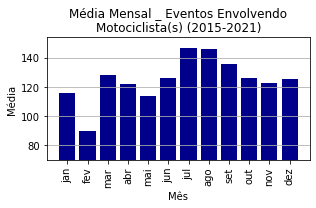

In [586]:
meses = {i:mes for i, mes in zip(range(1,13), ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])}

avg_bar(mean_datetime('year', 'month'), method='bar', ylim=(70,None), width=1, figsize=(4.5,3),
               title='Média Mensal _ Eventos Envolvendo\nMotociclista(s) (2015-2021)', 
               xlabel='Mês', ylabel='Média', path='Charts/ano_media.png', labels=meses)

### Distribuição Mensal Inícios de Eventos (Histograma Dias do Mês)

9500/9861


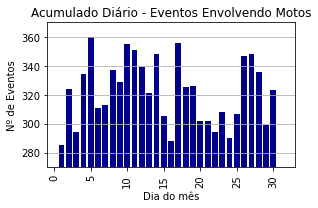

In [332]:
plot_by_metric('day', method='bar', ylim=(270,370), width=1, figsize=(4.5,3),
               title='Acumulado Diário - Eventos Envolvendo Motos', 
               xlabel='Dia do mês', ylabel='Nº de Eventos', path='Charts/dia.png')

9500/9861


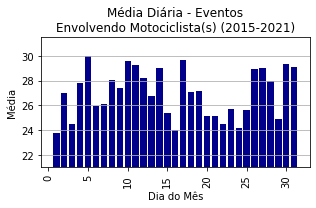

In [554]:
avg_bar(mean_datetime('month', 'day'), method='bar', ylim=(21,None), width=1, figsize=(4.5,3),
               title='Média Diária - Eventos\nEnvolvendo Motociclista(s) (2015-2021)', 
               xlabel='Dia do Mês', ylabel='Média', path='Charts/mes_media.png')

### Distribuição Hora Inícios de Eventos (Histograma Horas do Dia)

9500/9861


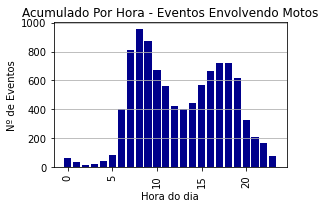

In [333]:
plot_by_metric('hour', method='bar', ylim=(None,None), width=1, figsize=(4.5,3),
               title='Acumulado Por Hora - Eventos Envolvendo Motos', 
               xlabel='Hora do dia', ylabel='Nº de Eventos', path='Charts/hora.png')

9500/9861


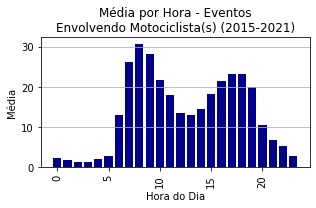

In [585]:
avg_bar(mean_datetime('day', 'hour'), method='bar', ylim=(None,None), width=1, figsize=(4.5,3),
               title='Média por Hora - Eventos\nEnvolvendo Motociclista(s) (2015-2021)', 
               xlabel='Hora do Dia', ylabel='Média', path='Charts/dia_media.png')

### Distribuição Semanal Inícios de Eventos (Histograma Horas do Dia)

9500/9861


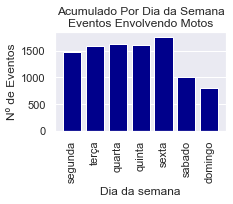

In [283]:
plot_by_metric('weekday', method='bar', ylim=(None,None), width=1, figsize=(3.4,3),
               title='Acumulado Por Dia da Semana\nEventos Envolvendo Motos', 
               xlabel='Dia da semana', ylabel='Nº de Eventos', path='Charts/semana.png', labels=dias_da_semana)

9500/9861


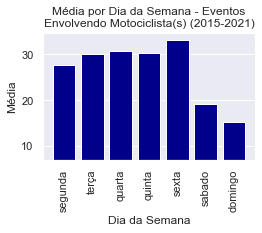

In [243]:
dias_da_semana = [i for i in ['segunda', 'terça', 'quarta', 'quinta', 'sexta', 'sabado', 'domingo']]
avg_bar(mean_datetime('week', 'weekday'), method='bar', ylim=(7,None), width=1, figsize=(3.8,3.4),
               title='Média por Dia da Semana - Eventos\nEnvolvendo Motociclista(s) (2015-2021)', 
               xlabel='Dia da Semana', ylabel='Média', path='Charts/semana_media.png', labels=dias_da_semana)

### Distribuição da Duração (Histograma Durações)

In [25]:
duracao = pd.Series([eventos_date['DURACAO'][i].seconds/3600 for i in range(len(eventos_date))])

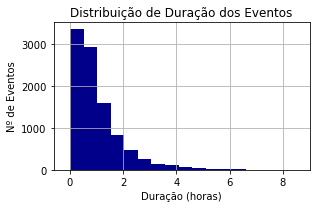

In [26]:
fig = plt.figure(figsize=(4.5,3)); ax = fig.add_subplot(111)

duracao.plot.hist(ax=ax, bins=24, color='darkblue')

ax.set(title='Distribuição de Duração dos Eventos',
       ylabel='Nº de Eventos',
       xlabel='Duração (horas)',
       xlim=(None, 9)
      )

ax.grid(axis='both')

fig.tight_layout(); plt.show(); #fig.savefig('Charts/Duração.png', tight_layout=True)


### Série Histórica Mensal

In [304]:
year_month = YearMonth(eventos_date['EVENTO_INICIO'])

year_month_df = pd.concat([eventos_date['EVENTO_ID'], year_month], 1)
date_cnt = year_month_df.groupby(0).count()

y_values = date_cnt['EVENTO_ID'].tolist()
x_values = date_cnt.index.tolist()

9500/9861


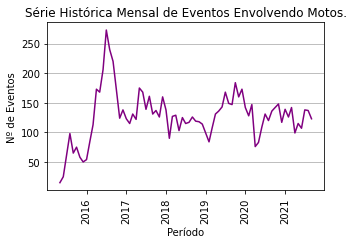

In [402]:
fig = plt.figure(figsize=(5,3.5)); ax = fig.add_subplot(111)

ax.plot(x_values[1:-1], y_values[1:-1],color='purple')
plt.xticks(rotation=90)

ax.set(title='Série Histórica Mensal de Eventos Envolvendo Motos.',
       ylabel='Nº de Eventos',
       xlabel='Período')

plt.grid(axis='y')

fig.tight_layout(); plt.show(); fig.savefig('Charts/Série_Histórica_Mensal.png', tight_layout=True)


### Eventos e Registros por Bairro

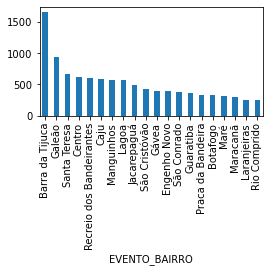

In [27]:
fig = plt.figure(figsize=(4,2))
com_df.groupby('EVENTO_BAIRRO').count().iloc[:, 0].sort_values(ascending=False).head(20).plot.bar(); plt.show()

# EXTRAINDO COORDENADAS

In [673]:
X, Y = 'EVENTO_LATITUDE', 'EVENTO_LONGITUDE'
com_NotEmpty = com_df.dropna(subset=[X, Y])

com_NotEmpty = com_NotEmpty[com_NotEmpty[X]<-22]
com_NotEmpty = com_NotEmpty[com_NotEmpty[Y]<-10]
com_NotEmpty = com_NotEmpty[com_NotEmpty[Y]>-44]

keep_cols = [X, Y, 'POP_TITULO', 'EVENTO_GRAVIDADE']

eventos_coords = com_NotEmpty.groupby('EVENTO_ID').first()[keep_cols].reset_index()

In [674]:
eventos_coords.to_csv('Dados Limpos/Eventos_Coords.csv', index=False)
eventos_coords.to_excel('Dados Limpos/Eventos_Coords.xlsx', index=False)

In [662]:
eventos_coords = pd.read_csv('Dados Limpos/Eventos_Coords.csv', index_col = 0)

In [675]:
eventos_coords

,EVENTO_ID,EVENTO_LATITUDE,EVENTO_LONGITUDE,POP_TITULO,EVENTO_GRAVIDADE
0,83,-22.940697,-43.182669,Acidente com vítima(s),BAIXO
1,84,-22.861659,-43.247759,Acidente com vítima(s) fatal(is),MEDIO
2,86,-22.972391,-43.397665,Acidente com vítima(s),BAIXO
3,88,-22.916647,-43.262988,Acidente/enguiço sem vítima,BAIXO
4,91,-22.935829,-43.183939,Acidente com vítima(s),BAIXO
...,...,...,...,...,...
8856,66923,-22.937476,-43.204748,Acidente com vítima(s),BAIXO
8857,66924,-22.893589,-43.215810,Acidente com vítima(s),BAIXO
8858,66925,-22.827869,-43.250314,Acidente com vítima(s),BAIXO
8859,66927,-22.868169,-43.232976,Acidente com vítima(s),BAIXO


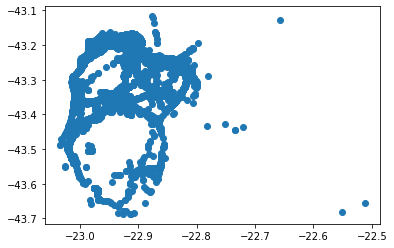

In [643]:
plt.scatter(eventos_coords[X], eventos_coords[Y]); plt.show()

# Comparação, Motos e Outros Acidentes

In [147]:
com_full = comando.copy()

In [148]:
com_full['MOTO'] = [1 if index in com_df.index else 0 for index in com_full.index]

In [149]:
com_full['MOTO'].mean()

0.22047282058424897

In [277]:
def var_prop(var, title, xlabel, ylabel, head):
    
    acao_moto = com_full[[var, 'MOTO']]

    acoes = acao_moto[var].unique()

    acoes_props = pd.Series([acao_moto[acao_moto[var]==acao]['MOTO'].mean() for acao in acoes], index=acoes)
    
    fig = plt.figure(figsize=(3,2)); ax=fig.add_subplot(111)
    
    acoes_props.sort_values(ascending=True).tail(head).plot.bar(ax=ax)
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    fig.tight_layout();
    plt.show(); fig.savefig('Charts/{}.png'.format(title), tight_layout=True)

<ipython-input-277-0f43b9e0b8d9>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout();


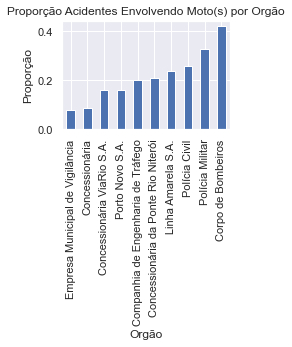

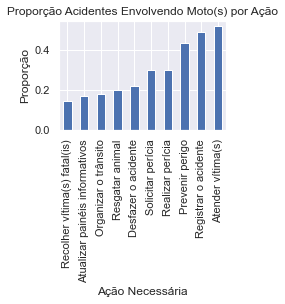

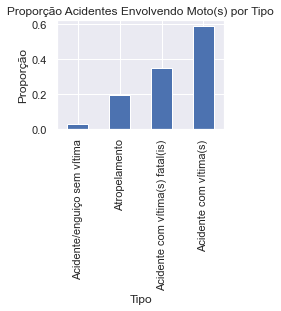

[None, None, None]

In [279]:
[var_prop(col, title, xlabel, ylabel, head) for col, title, xlabel, ylabel, head in zip(['ORGAO_NOME', 'ACAO', 'POP_TITULO'],
                                                           ['Proporção Acidentes Envolvendo\nMoto(s) por {}'.format(text).replace('\n', ' ') for text in ['Orgão', 'Ação', 'Tipo']],
                                                           ['Orgão', 'Ação Necessária', 'Tipo'],
                                                           ['Proporção']*3,
                                                           [10,10,4]
                                                          )]

In [189]:
com_full.columns

Index(['EVENTO_ID', 'EVENTO_TITULO', 'EVENTO_DESCRICAO', 'EVENTO_GRAVIDADE',
       'EVENTO_BAIRRO', 'STATUS', 'EVENTO_INICIO', 'EVENTO_FIM',
       'EVENTO_PRAZO', 'EVENTO_LATITUDE', 'EVENTO_LONGITUDE', 'POP_TITULO',
       'POP_DESCRICAO', 'ORGAO_SIGLA', 'ORGAO_NOME', 'ACAO', 'MOTO'],
      dtype='object')

# Análise de Duração

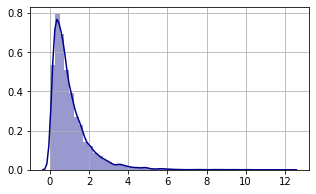

In [43]:
fig=plt.figure(figsize=(5,3)); ax = fig.add_subplot(1,1,1);
sns.distplot(duracao, color='darkblue', ax=ax); plt.grid(); ax.set(alpha=1);plt.show()

### tempo total

In [34]:
tot = duracao.sum(); tot, tot/24

(10386.101388888888, 432.75422453703703)

### tempo médio

In [31]:
duracao.mean(), (duracao.mean()-1)*60

(1.0532503183134483, 3.195019098806897)

In [33]:
duracao.median()*60

44.983333333333334

### tempo proporção

In [ ]:
eventos_date['DURACAO'][2].seconds

# Extraindo Exemplos de Alertas na Linha Vermelha

In [58]:
lin_ver = alertas.loc[alertas_dict['vermelha']['Index']]

motos_lin_ver = lin_ver[lin_ver.index.isin(motos.index)]

In [69]:
cnt=0
for i in motos_lin_ver.index:
    cnt+=1
    print(motos_lin_ver['Mensagem'].loc[i]); print()
    
    if cnt in range(0,50,3): 
        if input()=='exit': break


7/4/2021 - 18h03 - A concessionária Ecoponte retirou o carro e moto que colidiram e ocuparam uma faixa do sentido Niterói, altura da grande reta. Via está liberada, mas travessia em 26 minutos. Seguem congestionadas as vias de saída do Rio (Brasil, L. Vermelha, Gasômetro e Franc. Bicalho).  -----------------------------------  7/4/2021 - 17h11 - Um acidente envolvendo um carro e moto ocupa uma faixa do sentido Niterói, na altura da grande reta. Equipes da concessionária Ecoponte estão no local. Travessia estimada em 38 minutos pela concessionária. Os impactos do acidente já provocam congestionamento nas vias de saída do Rio (Av. Brasil, L. Vermelha, Gasômetro e Franc. Bicalho). #viasexpressas

12/10/2020 - 18h38 - Acidente envolvendo carro e moto interdita uma faixa da Linha Vermelha, sentido Centro, na altura da Maré. Trânsito com retenção. CET-Rio no local. #viasexpressas

20/07/2021 - 17h20 | A Linha Amarela foi liberada ao tráfego após trabalho do Corpo de Bombeiros no local do aci

 exit
